https://github.com/Coding-Lane/Image-Classification-CNN-Keras

Dataset Used: https://bit.ly/ImgClsKeras

# Assignment: image classification

Implement a CNN using Keras on top of TensorFlow to create a binary image classification model for predicting whether a given picture is of a cat or a dog.

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [46]:
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [47]:
print(len(X_train))

2000


In [48]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
#Normalization:

#The pixel values in images are typically in the range of 0 to 255. Normalizing the pixel values to the range [0, 1] is a common preprocessing step in machine learning.
#By dividing X_train and X_test by 255.0, the pixel values are scaled to the range [0, 1]. This normalization helps in training neural networks more effectively, as it ensures that the input values are within a similar scale.
X_train = X_train/255.0
X_test = X_test/255.0

In [49]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


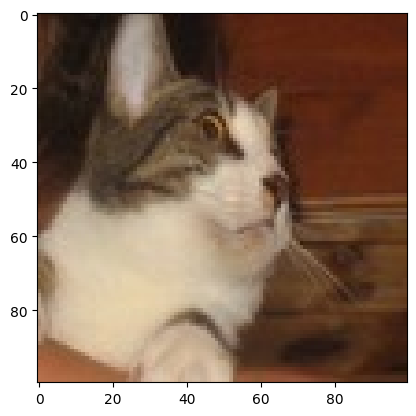

In [50]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [51]:
#print("Shape of X_train: ", X_train[1:7])

In [52]:
print("Shape of X_train: ", Y_train[1:7])


Shape of X_train:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# **Model**

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

# Assuming your data represents grayscale images with dimensions 100x100
#height, width, channels = 100, 100, 1

model = Sequential([
    # Convolutional layers
    #input_shape=(height, width, channels)
    #nput_shape = (100, 100, 3)
    #his indicates that each sample in your dataset is an image with dimensions 100x100 pixels and 3 color channels (assuming RGB images)
    Conv2D(32, (3, 3), input_shape = (100, 100, 3) ),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to transition from convolutional to fully connected layers
    Flatten(),

    # Fully connected layers
    Dense(64),
    Activation('relu'),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 activation_21 (Activation)  (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                

In [56]:
from tensorflow.keras.optimizers import Adam


In [57]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
#Assuming you have labels Y_train and Y_test for your training and testing data

In [37]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
50/50 [==============================] - 36s 699ms/step - loss: 0.6703 - accuracy: 0.6219 - val_loss: 0.8889 - val_accuracy: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 33s 673ms/step - loss: 0.6638 - accuracy: 0.6250 - val_loss: 0.8766 - val_accuracy: 0.0000e+00
Epoch 3/10
50/50 [==============================] - 33s 655ms/step - loss: 0.6629 - accuracy: 0.6250 - val_loss: 0.8623 - val_accuracy: 0.0000e+00
Epoch 4/10
50/50 [==============================] - 31s 610ms/step - loss: 0.6644 - accuracy: 0.6250 - val_loss: 0.9501 - val_accuracy: 0.0000e+00
Epoch 5/10
50/50 [==============================] - 32s 638ms/step - loss: 0.6622 - accuracy: 0.6250 - val_loss: 0.9430 - val_accuracy: 0.0000e+00
Epoch 6/10
50/50 [==============================] - 33s 654ms/step - loss: 0.6625 - accuracy: 0.6250 - val_loss: 1.0417 - val_accuracy: 0.0000e+00
Epoch 7/10
50/50 [==============================] - 35s 698ms/step - loss: 0.6615 - accuracy: 0.6250 - val_loss: 0.860

In [39]:
model.evaluate(X_test, Y_test) #epochs=10, batch_size=32, validation_split=0.2

13/13 [==============================] - 3s 257ms/step - loss: 0.7385 - accuracy: 0.5000


[0.7385253310203552, 0.5]

In [58]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 36s 1s/step - loss: 0.6737 - accuracy: 0.6225 - val_loss: 1.0430 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 0.6577 - accuracy: 0.6250 - val_loss: 1.0632 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 35s 1s/step - loss: 0.6303 - accuracy: 0.6250 - val_loss: 1.3269 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 0.6044 - accuracy: 0.6606 - val_loss: 0.8626 - val_accuracy: 0.2950
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 0.5890 - accuracy: 0.6906 - val_loss: 0.9693 - val_accuracy: 0.3300
Epoch 6/10
25/25 [==============================] - 35s 1s/step - loss: 0.5436 - accuracy: 0.7344 - val_loss: 1.2386 - val_accuracy: 0.2650
Epoch 7/10
25/25 [==============================] - 36s 1s/step - loss: 0.4945 - accuracy: 0.7656 - val_loss: 0.8862 - val_accuracy: 0.4925
Epoch 8/

In [59]:
model.evaluate(X_test, Y_test)#pochs=10, batch_size=64, validation_split=0.2

13/13 [==============================] - 3s 257ms/step - loss: 0.5951 - accuracy: 0.6875


[0.5950837135314941, 0.6875]

In [60]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [61]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [62]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 23s 698ms/step - loss: 0.7525 - accuracy: 0.5065
Epoch 2/5
32/32 [==============================] - 22s 681ms/step - loss: 0.6859 - accuracy: 0.6015
Epoch 3/5
32/32 [==============================] - 23s 733ms/step - loss: 0.6571 - accuracy: 0.6125
Epoch 4/5
32/32 [==============================] - 24s 741ms/step - loss: 0.5891 - accuracy: 0.7035
Epoch 5/5
32/32 [==============================] - 22s 705ms/step - loss: 0.5550 - accuracy: 0.7200


In [63]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 92ms/step - loss: 0.6367 - accuracy: 0.6200


[0.6367452144622803, 0.6200000047683716]

# Making predictions

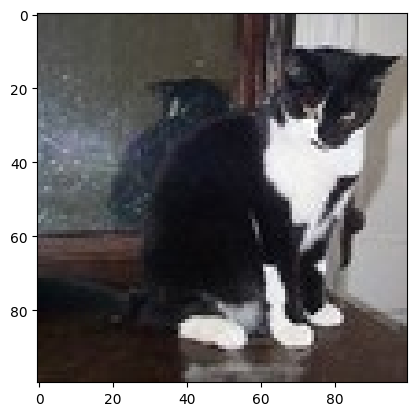

1/1 [==============================] - 0s 108ms/step
Our model says it is a : dog


In [64]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)